<a href="https://colab.research.google.com/github/joyjixu/qm2_resources/blob/main/data_preprocessing/%20normalise_covid_deaths_cases_by_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload data set with population estimates per state


In [5]:
import pandas as pd 
population = pd.read_csv('/content/us_population_abbreviated_state_name.csv')
print(population)

                   state  population_estimate state_abbreviation
0                 Alaska               734002                 AK
1                Alabama              4908621                 AL
2               Arkansas              3038999                 AR
3                Arizona              7378494                 AZ
4             California             39937489                 CA
5               Colorado              5845526                 CO
6            Connecticut              3563077                 CT
7   District of Columbia               720687                 DC
8               Delaware               982895                 DE
9                Florida             21992985                 FL
10               Georgia             10736059                 GA
11                Hawaii              1412687                 HI
12                  Iowa              3179849                 IA
13                 Idaho              1826156                 ID
14              Illinois 

Upload data set containing the covid-19 cases and deaths. The csv file should be already cleaned to only include the time period of interest.

In [6]:
april_covid = pd.read_csv("/content/april_covid_deaths_cases.csv") 
print(april_covid)

            date state  tot_cases  new_case  tot_death  new_death
0     04/01/2020    CO       3342       376         80         11
1     04/02/2020    CO       3728       386         97         17
2     04/03/2020    CO       4173       445        111         14
3     04/04/2020    CO       4565       392        126         15
4     04/05/2020    CO       4950       385        140         14
...          ...   ...        ...       ...        ...        ...
1795  04/26/2020    PW          0         0          0          0
1796  04/27/2020    PW          0         0          0          0
1797  04/28/2020    PW          0         0          0          0
1798  04/29/2020    PW          0         0          0          0
1799  04/30/2020    PW          0         0          0          0

[1800 rows x 6 columns]


Merge the two csv files so that the population estimates for each state are added to the csv file containing data on the number of covid-19 deaths and cases per state.

In [7]:
merge_covid = april_covid.merge(population,left_on="state", right_on="state_abbreviation")
(merge_covid)

,date,state_x,tot_cases,new_case,tot_death,new_death,state_y,population_estimate,state_abbreviation
0,04/01/2020,CO,3342,376,80,11,Colorado,5845526,CO
1,04/02/2020,CO,3728,386,97,17,Colorado,5845526,CO
2,04/03/2020,CO,4173,445,111,14,Colorado,5845526,CO
3,04/04/2020,CO,4565,392,126,15,Colorado,5845526,CO
4,04/05/2020,CO,4950,385,140,14,Colorado,5845526,CO
...,...,...,...,...,...,...,...,...,...
1525,04/26/2020,VT,851,8,46,0,Vermont,628061,VT
1526,04/27/2020,VT,855,4,47,1,Vermont,628061,VT
1527,04/28/2020,VT,862,7,47,0,Vermont,628061,VT
1528,04/29/2020,VT,862,0,47,0,Vermont,628061,VT


Normalise the data by dividing the total cases by the population for each state. This ensures population is taken into account, as otherwise covid-19 cases may be exagerated.

In [8]:
merge_covid['normalized_tot_cases'] = merge_covid['tot_cases']/merge_covid['population_estimate']*1000
merge_covid


,date,state_x,tot_cases,new_case,tot_death,new_death,state_y,population_estimate,state_abbreviation,normalized_tot_cases
0,04/01/2020,CO,3342,376,80,11,Colorado,5845526,CO,0.571719
1,04/02/2020,CO,3728,386,97,17,Colorado,5845526,CO,0.637753
2,04/03/2020,CO,4173,445,111,14,Colorado,5845526,CO,0.713879
3,04/04/2020,CO,4565,392,126,15,Colorado,5845526,CO,0.780939
4,04/05/2020,CO,4950,385,140,14,Colorado,5845526,CO,0.846801
...,...,...,...,...,...,...,...,...,...,...
1525,04/26/2020,VT,851,8,46,0,Vermont,628061,VT,1.354964
1526,04/27/2020,VT,855,4,47,1,Vermont,628061,VT,1.361333
1527,04/28/2020,VT,862,7,47,0,Vermont,628061,VT,1.372478
1528,04/29/2020,VT,862,0,47,0,Vermont,628061,VT,1.372478


Normalise the data by dividing the total new cases by the population for each state.

In [9]:
merge_covid['normalized_new_case'] = merge_covid['new_case']/merge_covid['population_estimate']*1000
merge_covid

,date,state_x,tot_cases,new_case,tot_death,new_death,state_y,population_estimate,state_abbreviation,normalized_tot_cases,normalized_new_case
0,04/01/2020,CO,3342,376,80,11,Colorado,5845526,CO,0.571719,0.064323
1,04/02/2020,CO,3728,386,97,17,Colorado,5845526,CO,0.637753,0.066033
2,04/03/2020,CO,4173,445,111,14,Colorado,5845526,CO,0.713879,0.076127
3,04/04/2020,CO,4565,392,126,15,Colorado,5845526,CO,0.780939,0.067060
4,04/05/2020,CO,4950,385,140,14,Colorado,5845526,CO,0.846801,0.065862
...,...,...,...,...,...,...,...,...,...,...,...
1525,04/26/2020,VT,851,8,46,0,Vermont,628061,VT,1.354964,0.012738
1526,04/27/2020,VT,855,4,47,1,Vermont,628061,VT,1.361333,0.006369
1527,04/28/2020,VT,862,7,47,0,Vermont,628061,VT,1.372478,0.011145
1528,04/29/2020,VT,862,0,47,0,Vermont,628061,VT,1.372478,0.000000


Normalise the data by dividing the total deaths by the population for each state.

In [10]:
merge_covid['normalized_tot_death'] = merge_covid['tot_death']/merge_covid['population_estimate']*1000
merge_covid

,date,state_x,tot_cases,new_case,tot_death,new_death,state_y,population_estimate,state_abbreviation,normalized_tot_cases,normalized_new_case,normalized_tot_death
0,04/01/2020,CO,3342,376,80,11,Colorado,5845526,CO,0.571719,0.064323,0.013686
1,04/02/2020,CO,3728,386,97,17,Colorado,5845526,CO,0.637753,0.066033,0.016594
2,04/03/2020,CO,4173,445,111,14,Colorado,5845526,CO,0.713879,0.076127,0.018989
3,04/04/2020,CO,4565,392,126,15,Colorado,5845526,CO,0.780939,0.067060,0.021555
4,04/05/2020,CO,4950,385,140,14,Colorado,5845526,CO,0.846801,0.065862,0.023950
...,...,...,...,...,...,...,...,...,...,...,...,...
1525,04/26/2020,VT,851,8,46,0,Vermont,628061,VT,1.354964,0.012738,0.073241
1526,04/27/2020,VT,855,4,47,1,Vermont,628061,VT,1.361333,0.006369,0.074833
1527,04/28/2020,VT,862,7,47,0,Vermont,628061,VT,1.372478,0.011145,0.074833
1528,04/29/2020,VT,862,0,47,0,Vermont,628061,VT,1.372478,0.000000,0.074833


Normalise the data by dividing the total new deaths by the population for each state.

In [11]:
merge_covid['normalized_new_death'] = merge_covid['new_death']/merge_covid['population_estimate']*1000
merge_covid

,date,state_x,tot_cases,new_case,tot_death,new_death,state_y,population_estimate,state_abbreviation,normalized_tot_cases,normalized_new_case,normalized_tot_death,normalized_new_death
0,04/01/2020,CO,3342,376,80,11,Colorado,5845526,CO,0.571719,0.064323,0.013686,0.001882
1,04/02/2020,CO,3728,386,97,17,Colorado,5845526,CO,0.637753,0.066033,0.016594,0.002908
2,04/03/2020,CO,4173,445,111,14,Colorado,5845526,CO,0.713879,0.076127,0.018989,0.002395
3,04/04/2020,CO,4565,392,126,15,Colorado,5845526,CO,0.780939,0.067060,0.021555,0.002566
4,04/05/2020,CO,4950,385,140,14,Colorado,5845526,CO,0.846801,0.065862,0.023950,0.002395
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,04/26/2020,VT,851,8,46,0,Vermont,628061,VT,1.354964,0.012738,0.073241,0.000000
1526,04/27/2020,VT,855,4,47,1,Vermont,628061,VT,1.361333,0.006369,0.074833,0.001592
1527,04/28/2020,VT,862,7,47,0,Vermont,628061,VT,1.372478,0.011145,0.074833,0.000000
1528,04/29/2020,VT,862,0,47,0,Vermont,628061,VT,1.372478,0.000000,0.074833,0.000000


Remove the columns we do not require.

In [ ]:
merge_covid = merge_covid.drop(['state_x','state_y'], axis=1)
merge_covid

Export the file as a csv

In [13]:
merge_covid.to_csv(r'normalised_covid_deaths_cases.csv', index = False)

In [14]:
import matplotlib.pyplot as plt
colorado=merge_covid[merge_covid['state_abbreviation']=="CO"]
colorado

,date,state_x,tot_cases,new_case,tot_death,new_death,state_y,population_estimate,state_abbreviation,normalized_tot_cases,normalized_new_case,normalized_tot_death,normalized_new_death
0,04/01/2020,CO,3342,376,80,11,Colorado,5845526,CO,0.571719,0.064323,0.013686,0.001882
1,04/02/2020,CO,3728,386,97,17,Colorado,5845526,CO,0.637753,0.066033,0.016594,0.002908
2,04/03/2020,CO,4173,445,111,14,Colorado,5845526,CO,0.713879,0.076127,0.018989,0.002395
3,04/04/2020,CO,4565,392,126,15,Colorado,5845526,CO,0.780939,0.067060,0.021555,0.002566
4,04/05/2020,CO,4950,385,140,14,Colorado,5845526,CO,0.846801,0.065862,0.023950,0.002395
5,04/06/2020,CO,5172,222,150,10,Colorado,5845526,CO,0.884779,0.037978,0.025661,0.001711
6,04/07/2020,CO,5429,257,179,29,Colorado,5845526,CO,0.928744,0.043965,0.030622,0.004961
7,04/08/2020,CO,5655,226,193,14,Colorado,5845526,CO,0.967407,0.038662,0.033017,0.002395
8,04/09/2020,CO,6202,547,226,33,Colorado,5845526,CO,1.060982,0.093576,0.038662,0.005645
9,04/10/2020,CO,6365,163,250,24,Colorado,5845526,CO,1.088867,0.027885,0.042768,0.004106


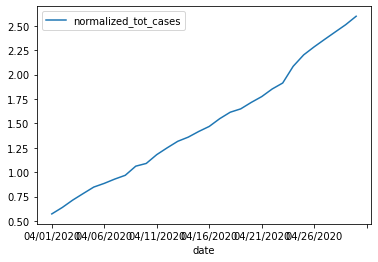

In [15]:
colorado.plot(x='date',y='normalized_tot_cases')


In [16]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
state_names=us_state_abbrev.values()
print(state_names)

dict_values(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY'])


Adjust the figure size.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

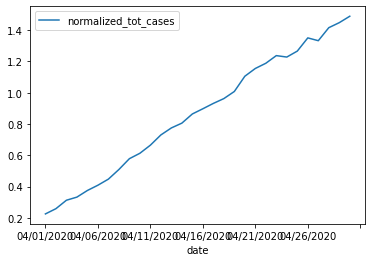

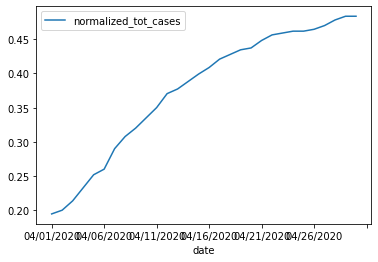

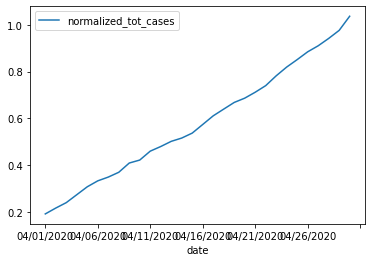

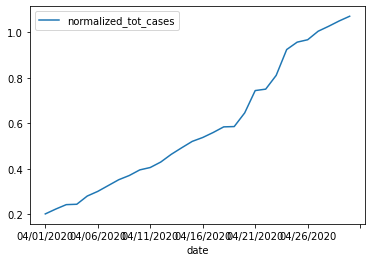

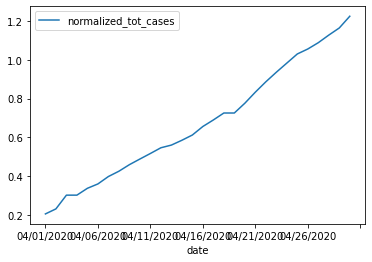

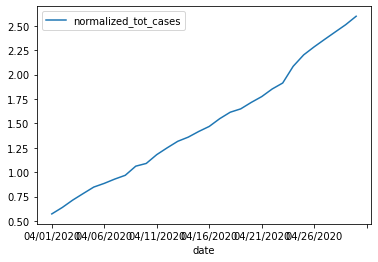

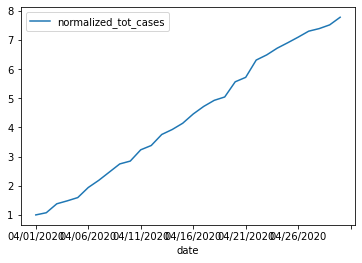

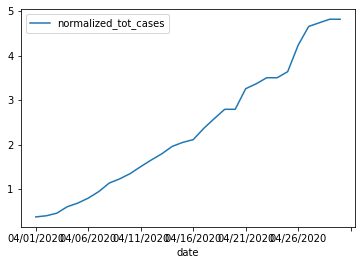

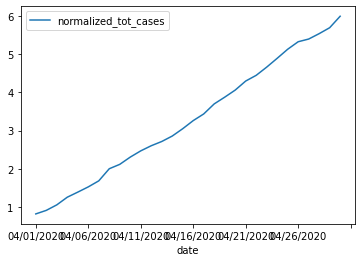

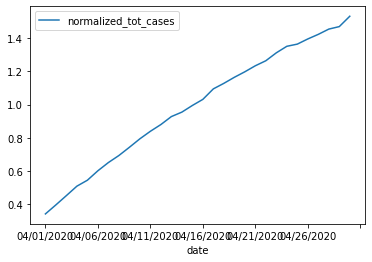

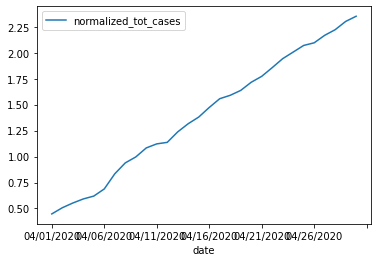

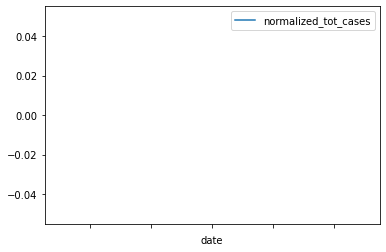

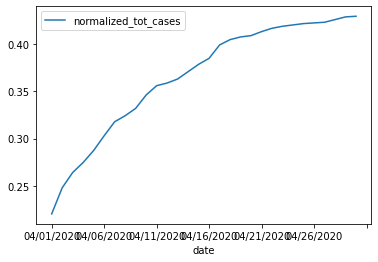

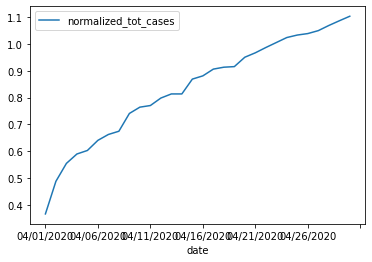

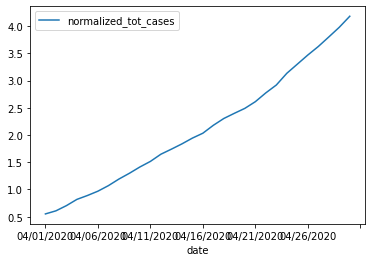

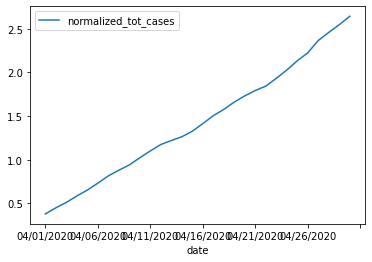

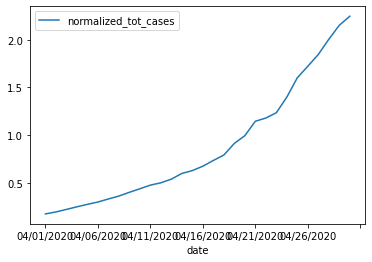

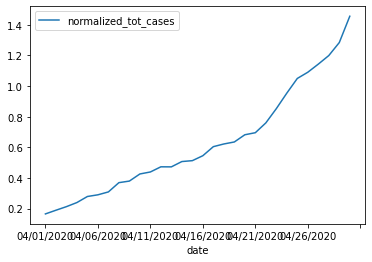

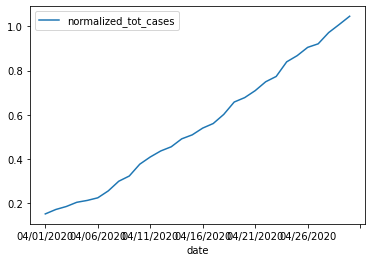

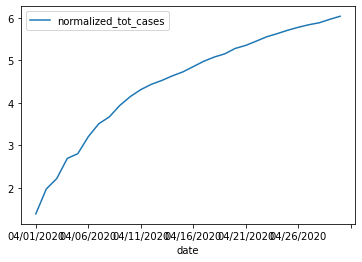

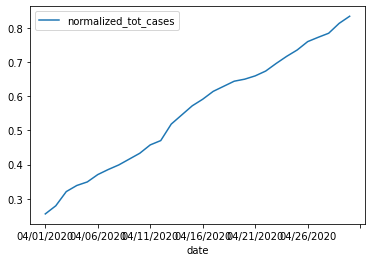

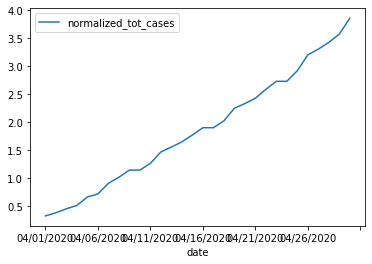

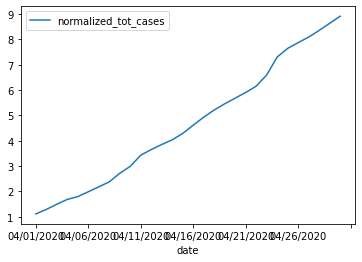

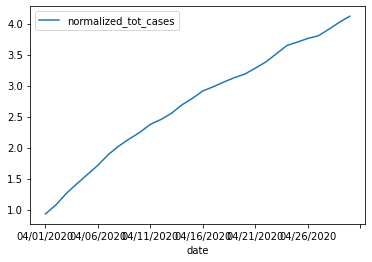

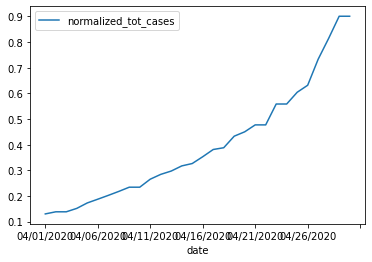

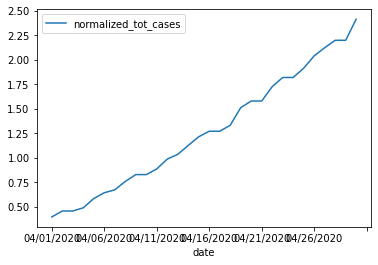

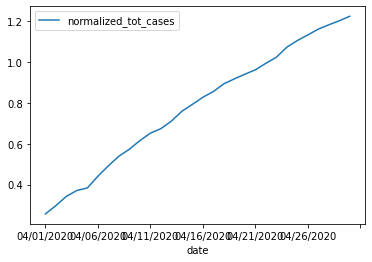

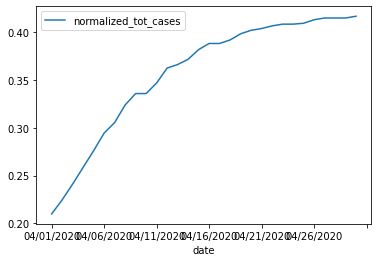

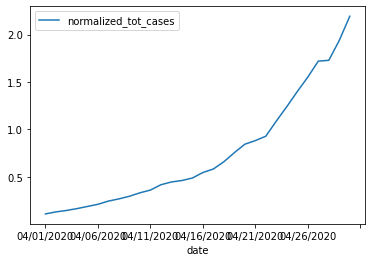

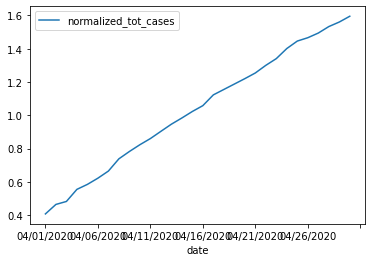

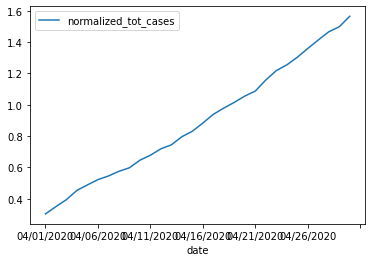

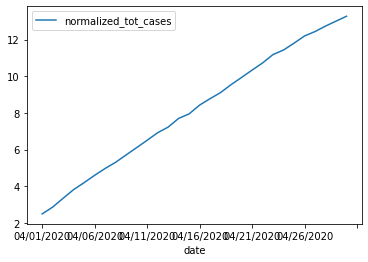

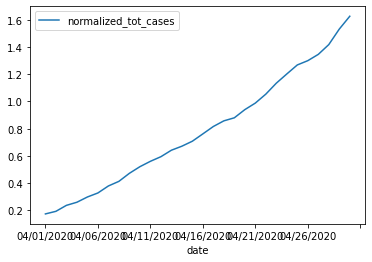

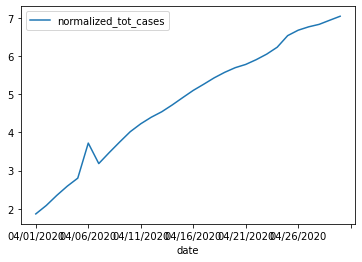

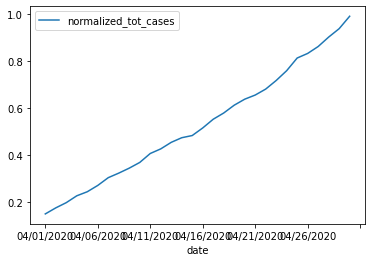

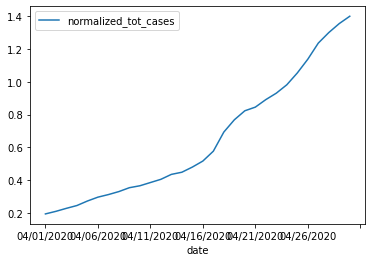

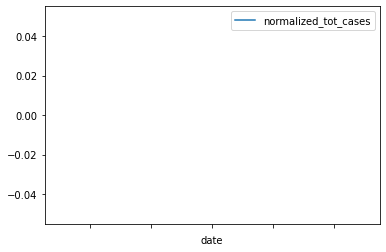

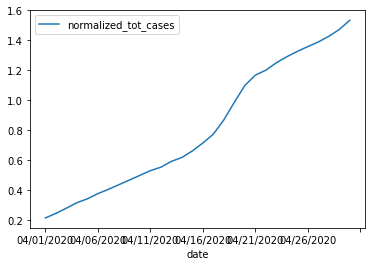

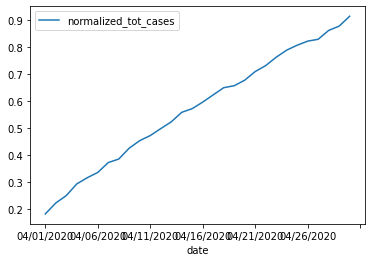

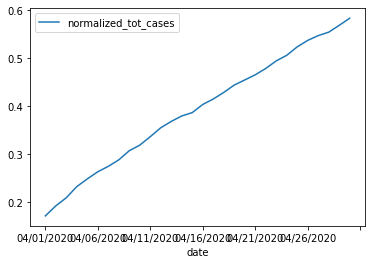

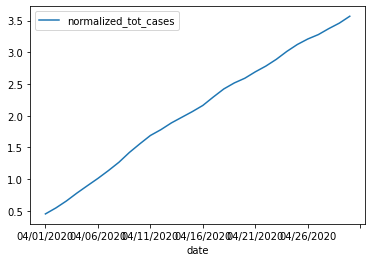

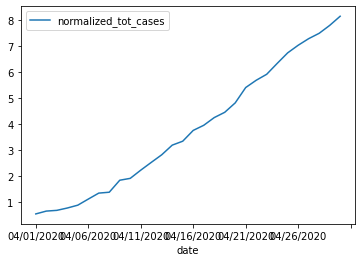

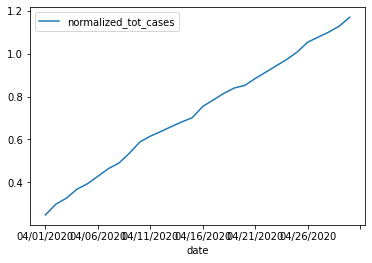

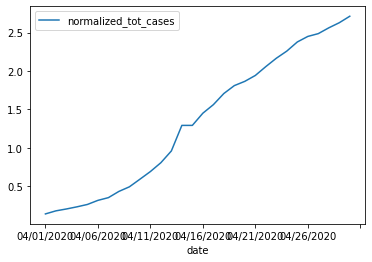

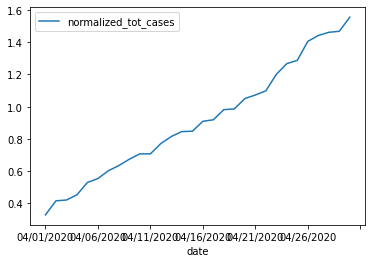

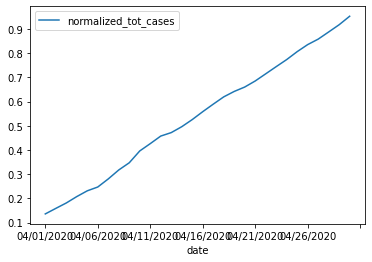

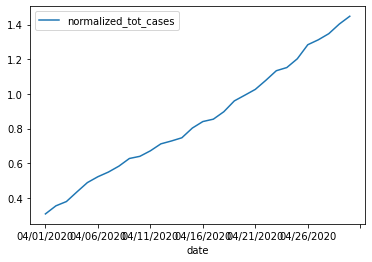

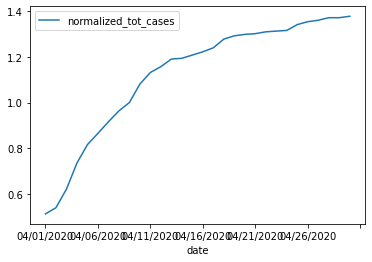

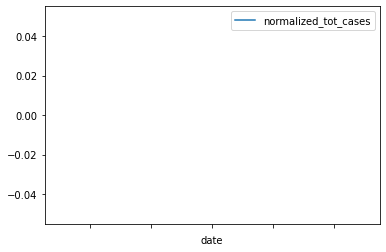

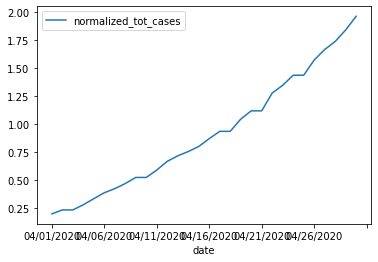

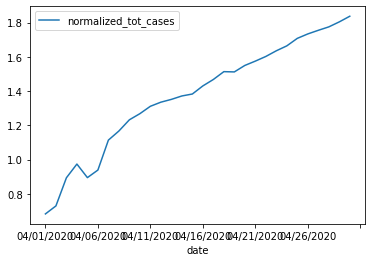

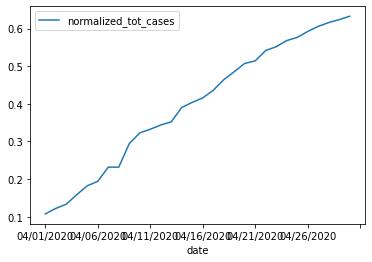

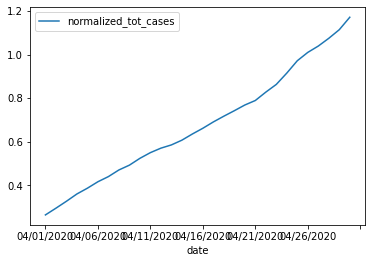

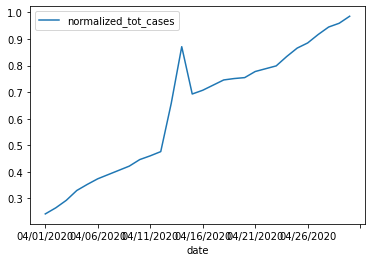

In [17]:
for name in state_names:
  state=merge_covid[merge_covid['state_abbreviation']==name]
  state.plot(x='date',y='normalized_tot_cases')
  plt.figure(figsize=(40, 40))
  plt.savefig('april_covid_{}'.format(name))
  plt.close()




